# Data Mining Analysis V1
## Assignment 1: Data Preprocessing
### Łukasz Borak, Jakub Jagła, Krzysztof Bryszak, Maksymilian Żmuda-Trzebiatowski
---
We decided to work on the Titanic dataset. It can be found on kaggle: https://www.kaggle.com/competitions/titanic/data
For the code to work, the data should be saved inside a 'data' folder.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
test = pd.read_csv('data/test.csv')
ids = test.PassengerId
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#

In [5]:
'''
PassengerId:    int,    drop it - useless for prediction
Pclass:         int,    no preprocessing needed
Name:           string, drop it or maybe extract title feature (doesn't improve acc)
Sex:            string, need to one-hot encode
Age:            float,  impute missing values with mean age
SibSp:          int,    no preprocessing needed, maybe new col for family size
Parch:          int,    no preprocessing needed, maybe new col for family size
Ticket:         string, drop it
Fare:           float,  impute missing values with median fare
Cabin:          string, replace missing values with 'Unknown' (we don't want to drop it because that will drop most of the dataset)
Embarked:       string, impute missing values with most frequent value, encode the letters as numbers
'''
def preprocessing(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset.copy()
    
    dataset = dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1) # Drop Name and Ticket columns
    
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}) # One-hot encode sex
    
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean()) # Impute missing age with mean

    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median()) # Impute missing fare with median

    dataset['Cabin'] = dataset['Cabin'].fillna('Unknown') # Fill missing cabin values with 'Unknown'    
    dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[0]) # Get only the first character of the Cabin number
    dataset['Cabin'] = dataset['Cabin'].map({'U': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 7}) # Encode cabin letters as numbers

    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0]) # Impute missing embarked with most frequent value
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) # Encode letters as numbers
    
    dataset = pd.get_dummies(dataset, columns=['Cabin'], prefix='Cabin')
    #dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix='Embarked')
    #dataset = pd.get_dummies(dataset, columns=["Pclass"], prefix="Pclass")

    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1 # Create a new feature for family size
    dataset.drop(columns=['SibSp', 'Parch'], inplace=True)
    
    return dataset

train_preprocessed = preprocessing(train)

X = train_preprocessed.drop(['Survived'], axis=1)
y = train_preprocessed.Survived
X.head()

,Pclass,Sex,Age,Fare,Embarked,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Family_Size
0,3,1,22.0,7.2500,0,True,False,False,False,False,False,False,False,2
1,1,0,38.0,71.2833,1,False,False,False,True,False,False,False,False,2
2,3,0,26.0,7.9250,0,True,False,False,False,False,False,False,False,1
3,1,0,35.0,53.1000,0,False,False,False,True,False,False,False,False,2
4,3,1,35.0,8.0500,0,True,False,False,False,False,False,False,False,1


In [6]:
test_preprocessed = preprocessing(test)
test_preprocessed.head()

,Pclass,Sex,Age,Fare,Embarked,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Family_Size
0,3,1,34.5,7.8292,2,True,False,False,False,False,False,False,False,1
1,3,0,47.0,7.0000,0,True,False,False,False,False,False,False,False,2
2,2,1,62.0,9.6875,2,True,False,False,False,False,False,False,False,1
3,3,1,27.0,8.6625,0,True,False,False,False,False,False,False,False,1
4,3,0,22.0,12.2875,0,True,False,False,False,False,False,False,False,3


In [7]:
print(X.shape,test_preprocessed.shape)

(891, 14) (418, 14)


In [8]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Age', 'Fare', 'Family_Size'] # only scale the non-categorical columns
columns_not_to_scale = X.columns.difference(columns_to_scale)
columns_not_to_scale_test = test_preprocessed.columns.difference(columns_to_scale)

# Scale the desired columns
scaler = StandardScaler()
X_scaled_columns = scaler.fit_transform(X[columns_to_scale])
X_scaled_columns = pd.DataFrame(X_scaled_columns, columns=columns_to_scale, index=X.index)
X_scaled = pd.concat([X_scaled_columns, X[columns_not_to_scale]], axis=1)

test_scaled_columns = scaler.fit_transform(test_preprocessed[columns_to_scale])
test_scaled_columns = pd.DataFrame(test_scaled_columns, columns=columns_to_scale, index=test_preprocessed.index)
test_scaled = pd.concat([test_scaled_columns, test_preprocessed[columns_not_to_scale_test]], axis=1)

X_scaled.std()**2

Age            1.001124
Fare           1.001124
Family_Size    1.001124
Cabin_0        0.176734
Cabin_1        0.016570
Cabin_2        0.050023
Cabin_3        0.061902
Cabin_4        0.035705
Cabin_5        0.034664
Cabin_6        0.014394
Cabin_7        0.005586
Embarked       0.404081
Pclass         0.699015
Sex            0.228475
dtype: float64

<Axes: >

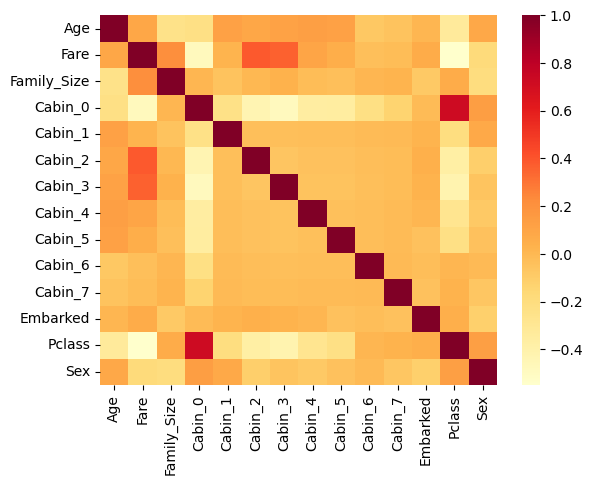

In [9]:
sns.heatmap(X_scaled.corr(), cmap='YlOrRd')

## Linear Support Vector Classification

In [10]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty='l1', dual=False, random_state=42).fit(X_scaled, y)
model = SelectFromModel(lsvc, prefit=True, max_features=4)
X_scaled_new = model.transform(X_scaled)
test_new = model.transform(test_scaled)
X_scaled_new.shape


c:\Users\Luki\anaconda3\envs\dm_env\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Luki\anaconda3\envs\dm_env\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(891, 4)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_train)

print(f'TRAIN\nPreprocessed and scaled: {accuracy_score(y_train, y_pred)}')

TRAIN
Preprocessed and scaled: 0.9807383627608347


In [12]:
y_pred = model.predict(X_test)
print(f'TEST\nPreprocessed and scaled: {accuracy_score(y_test, y_pred)}')

TEST
Preprocessed and scaled: 0.8134328358208955


In [13]:
final_predictions = model.predict(test_new)
print(final_predictions)
submission = pd.DataFrame({'PassengerId':ids,'Survived':final_predictions})
submission.head()

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [14]:
submission.to_csv('test.csv',index=False)

# Regressor

In [15]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

estimator = DecisionTreeRegressor()
selector = RFE(estimator, n_features_to_select=4, step=0.5)
selector = selector.fit(X_scaled, y)
print(selector.support_)

for (attr, rank, selected) in zip(X_scaled.columns, selector.ranking_, selector.support_):
    if selected: print(f'{attr:>10}: rank={rank:<2} selected={selected}')

X_scaled_new = X_scaled.loc[:, selector.support_]
X_scaled_new.head()

[ True  True False False False False False False False False False False
  True  True]
       Age: rank=1  selected=True
      Fare: rank=1  selected=True
    Pclass: rank=1  selected=True
       Sex: rank=1  selected=True


,Age,Fare,Pclass,Sex
0,-0.592481,-0.502445,3,1
1,0.638789,0.786845,1,0
2,-0.284663,-0.488854,3,0
3,0.407926,0.420730,1,0
4,0.407926,-0.486337,3,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_train)

print(f'TRAIN\nPreprocessed and scaled: {accuracy_score(y_train, y_pred)}')

TRAIN
Preprocessed and scaled: 0.9791332263242376


In [17]:
y_pred = model.predict(X_test)
print(f'TEST\nPreprocessed and scaled: {accuracy_score(y_test, y_pred)}')

TEST
Preprocessed and scaled: 0.8097014925373134


In [18]:
final_predictions = model.predict(test_new)
submission = pd.DataFrame({'PassengerId':ids,'Survived':final_predictions})
submission.head()

c:\Users\Luki\anaconda3\envs\dm_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [19]:
submission.to_csv('test2.csv',index=False)